In [13]:
import cv2
import matplotlib.pyplot as plt
import time

In [9]:
images = [
    "image_01.png",
    "image_02.png",
    "image_03.png"
]

In [10]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

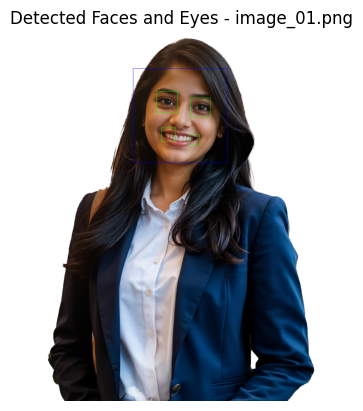

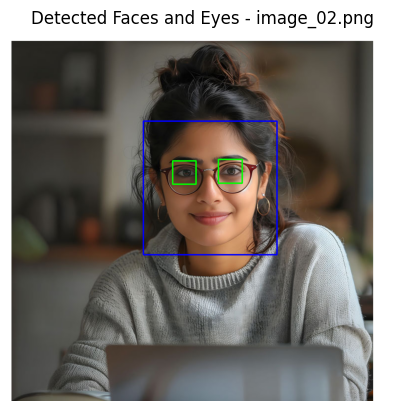

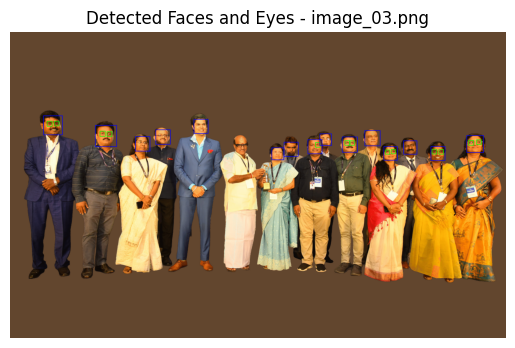

In [11]:
for img_path in images:
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = img[y:y + h, x:x + w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.imshow(img_rgb)
    plt.title(f"Detected Faces and Eyes - {img_path}")
    plt.axis("off")
    plt.show()

Image captured!


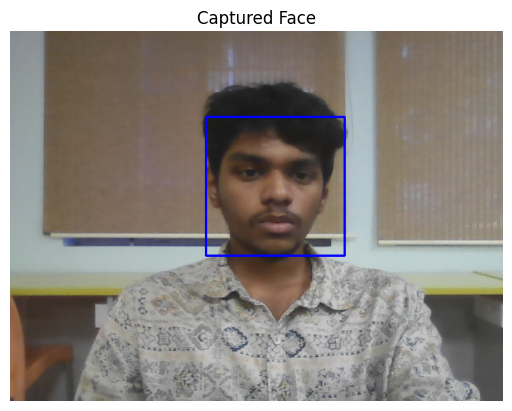

In [ ]:
cap = cv2.VideoCapture(0)
captured_frame = None

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

    cv2.imshow('Video Face Detection', frame)

    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break
    elif key == ord('s'):
        captured_frame = frame.copy()
        print("Image captured!")
        break

cap.release()
cv2.destroyAllWindows()

if captured_frame is not None:
    cv2.imwrite('captured_face.png', captured_frame)
    time.sleep(0.3) 
    captured_image = cv2.imread('captured_face.png')
    
    plt.imshow(cv2.cvtColor(captured_image, cv2.COLOR_BGR2RGB))
    plt.title('Captured Face')
    plt.axis('off')
    plt.show()
else:
    print("No image was captured. Press 's' while camera was open.")